# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
SEED = 0xDEAD
DATA_PATH = x_path = os.path.join(os.path.abspath(os.path.join(".", os.pardir)), "data/data.csv")
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


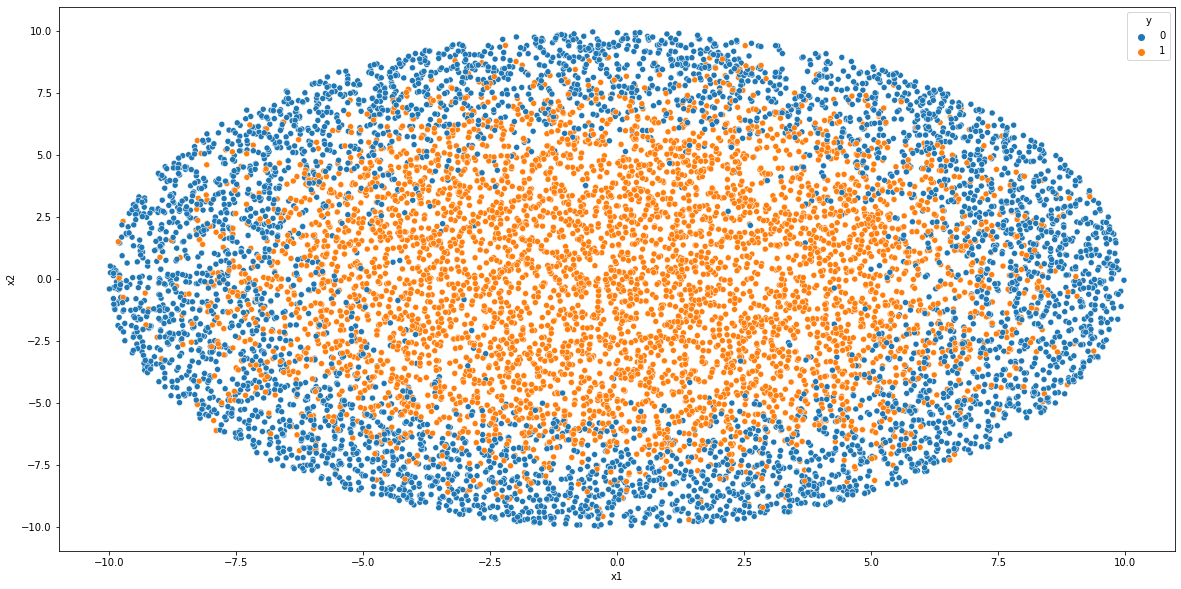

In [39]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'],
                                                    test_size = 0.33,
                                                    random_state=SEED)

Точность нашей модели 0.5869696969696969


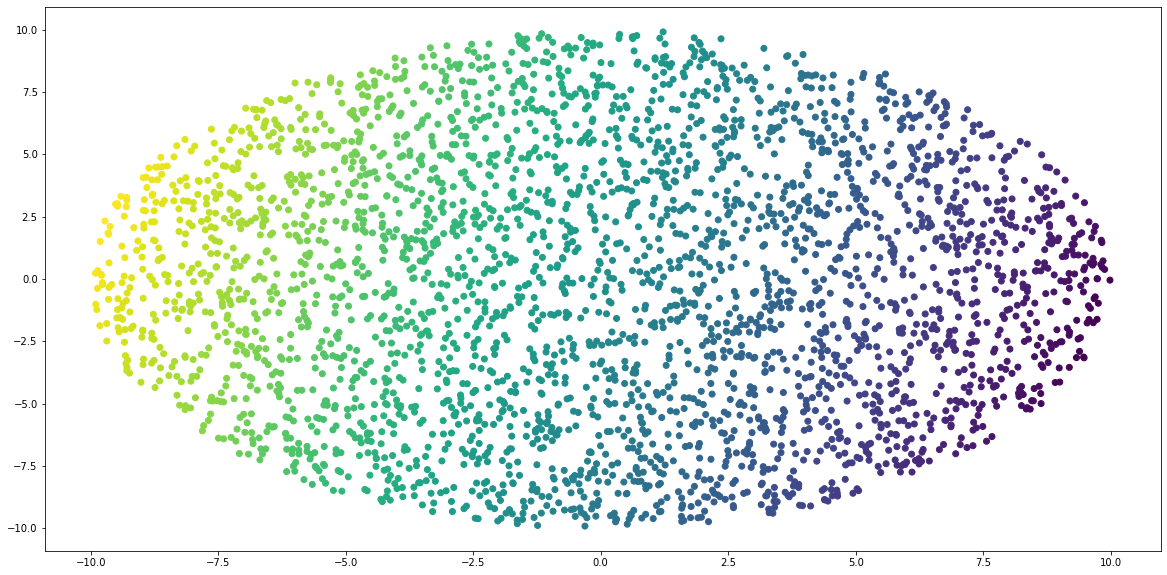

In [42]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
logreg = LogisticRegression(C=0.1, random_state=SEED)
logreg.fit(X_train, y_train)

predict_logit = logreg.predict(X_test)
predict_proba = logreg.predict_proba(X_test)
predict_log_proba = logreg.predict_log_proba(X_test)

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_proba[:,0])
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Ответ: Ввести координату радиуса, на котором находится точка. 

Точность нашей модели 0.8403030303030303


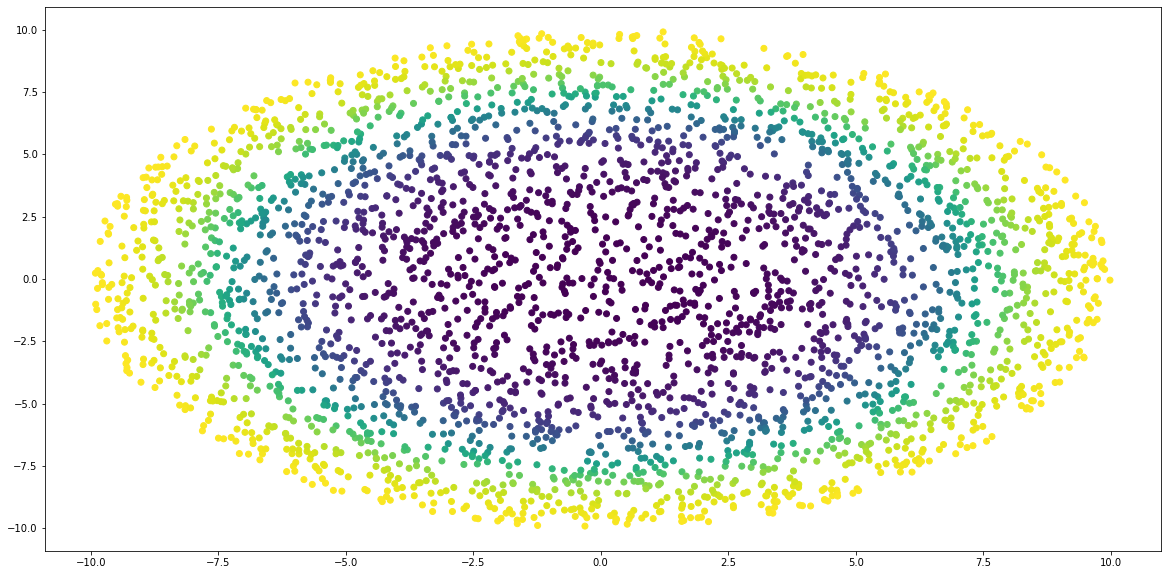

In [43]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df_new['x1']**2 + df_new['x2']**2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33, random_state=SEED)

logreg = LogisticRegression(C=0.1, random_state=SEED)
logreg.fit(X_train_new, y_train_new)

predict_logit = logreg.predict(X_test_new)
predict_proba = logreg.predict_proba(X_test_new)
predict_log_proba = logreg.predict_log_proba(X_test_new)
#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_proba[:,0])
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Ответ: Глубина дерева. При огромной глубине дерева каждый элемент будет в собственном листе, что является переобучением.

Точность нашей модели 0.8227272727272728


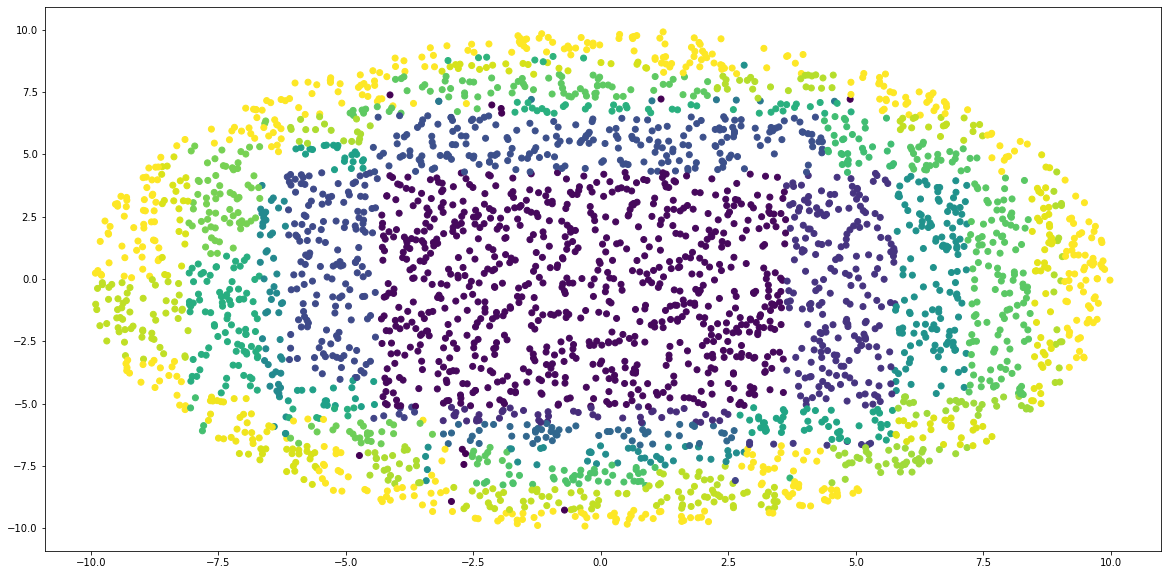

In [55]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                       max_features=2, random_state=SEED)

decision_tree.fit(X_train, y_train)

predict_tree = decision_tree.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = decision_tree.predict_proba(X_test)

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba[:,0])
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Ответ: Ансамблирование работает когда модели достаточно простые и разнообразные. В случае случайного леса специально вводят параметры для обучения деревьев на различных подвыборках данных и разных колличествах признаков. В этом случае деревья получаются разнообразными и в большинстве своем это дает хорошие результаты

Точность нашей модели 0.8345454545454546


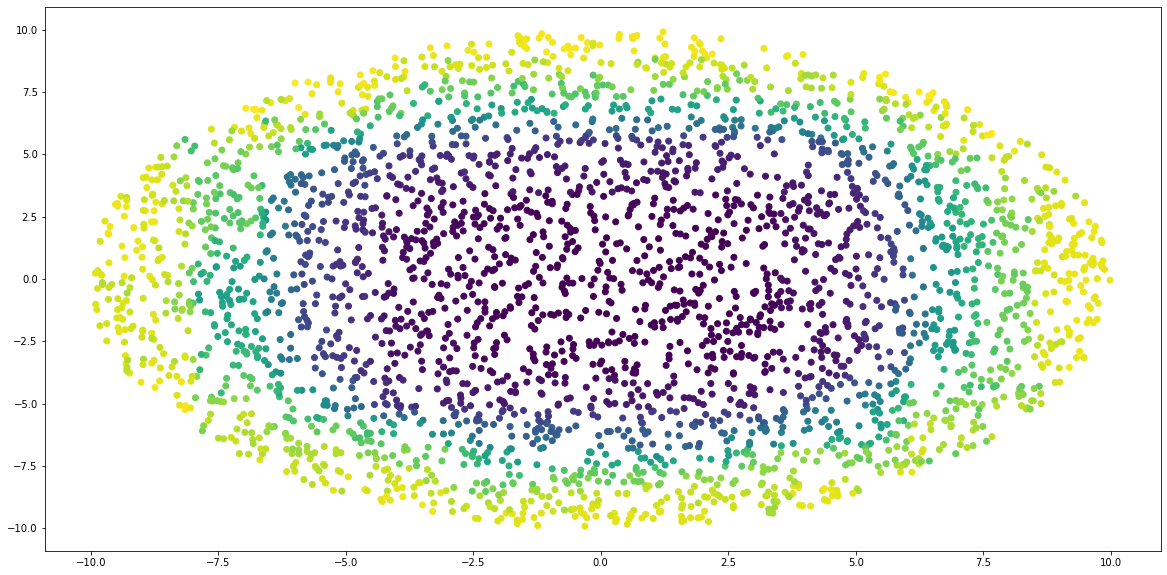

In [69]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код
forest = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=8, bootstrap=True,
                                random_state=SEED, max_samples=5000)
forest.fit(X_train, y_train)

predict_forest = forest.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = forest.predict_proba(X_test)

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba[:,0])
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

In [70]:
# Подгружаем понравившийся фраемворк 
# Собираем сетку
# Учим и радуемся!
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import layers as L         # Уже готовые слои для моделей
from tensorflow.keras.models import Sequential   # Специальный класс для склеивания слоёв
from tensorflow.keras.models import Model        # Альтернативный класс для склейки слоёв
import tensorflow.keras.optimizers as opt        # Разные оптимизационные алгоритмы :3

In [164]:
def get_model(n_features):
    inputs = tf.keras.Input(shape=[n_features,])
    x = L.Dense(5, activation=tf.nn.relu)(inputs)
    x = L.Dense(5, activation=tf.nn.relu)(x)
    outputs = L.Dense(1, activation=tf.nn.sigmoid)(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [165]:
model = get_model(n_features=2)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_42 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_43 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [166]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                                 patience=10, verbose=1, mode='min',
                                                 min_delta=0.0001, cooldown=0,
                                                 min_lr=1e-6)

early_stopping = early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True)

model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])

In [167]:
hist = model.fit(x=X_train, y=y_train,
                 validation_data=(X_test, y_test),
                 epochs=200, verbose=2,
                 callbacks=[reduce_lr, early_stopping])

Epoch 1/200
210/210 - 1s - loss: 0.6622 - accuracy: 0.5824 - val_loss: 0.6422 - val_accuracy: 0.6630
Epoch 2/200
210/210 - 0s - loss: 0.6266 - accuracy: 0.6649 - val_loss: 0.6113 - val_accuracy: 0.6815
Epoch 3/200
210/210 - 0s - loss: 0.5974 - accuracy: 0.7001 - val_loss: 0.5858 - val_accuracy: 0.7321
Epoch 4/200
210/210 - 0s - loss: 0.5626 - accuracy: 0.7422 - val_loss: 0.5450 - val_accuracy: 0.7733
Epoch 5/200
210/210 - 0s - loss: 0.5143 - accuracy: 0.7861 - val_loss: 0.4898 - val_accuracy: 0.7994
Epoch 6/200
210/210 - 0s - loss: 0.4690 - accuracy: 0.8118 - val_loss: 0.4572 - val_accuracy: 0.8055
Epoch 7/200
210/210 - 0s - loss: 0.4405 - accuracy: 0.8154 - val_loss: 0.4310 - val_accuracy: 0.8206
Epoch 8/200
210/210 - 0s - loss: 0.4206 - accuracy: 0.8236 - val_loss: 0.4178 - val_accuracy: 0.8167
Epoch 9/200
210/210 - 0s - loss: 0.4072 - accuracy: 0.8233 - val_loss: 0.4034 - val_accuracy: 0.8312
Epoch 10/200
210/210 - 0s - loss: 0.3967 - accuracy: 0.8272 - val_loss: 0.3953 - val_accura

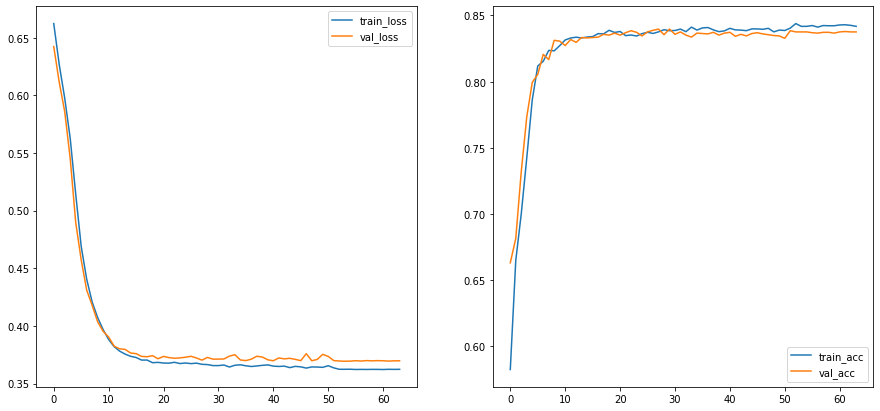

In [168]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(hist.history['loss'], label='train_loss')
ax[0].plot(hist.history['val_loss'], label='val_loss')
ax[0].legend()
ax[1].plot(hist.history['accuracy'], label='train_acc')
ax[1].plot(hist.history['val_accuracy'], label='val_acc')
ax[1].legend();

Точность нашей модели 0.8375757575757575


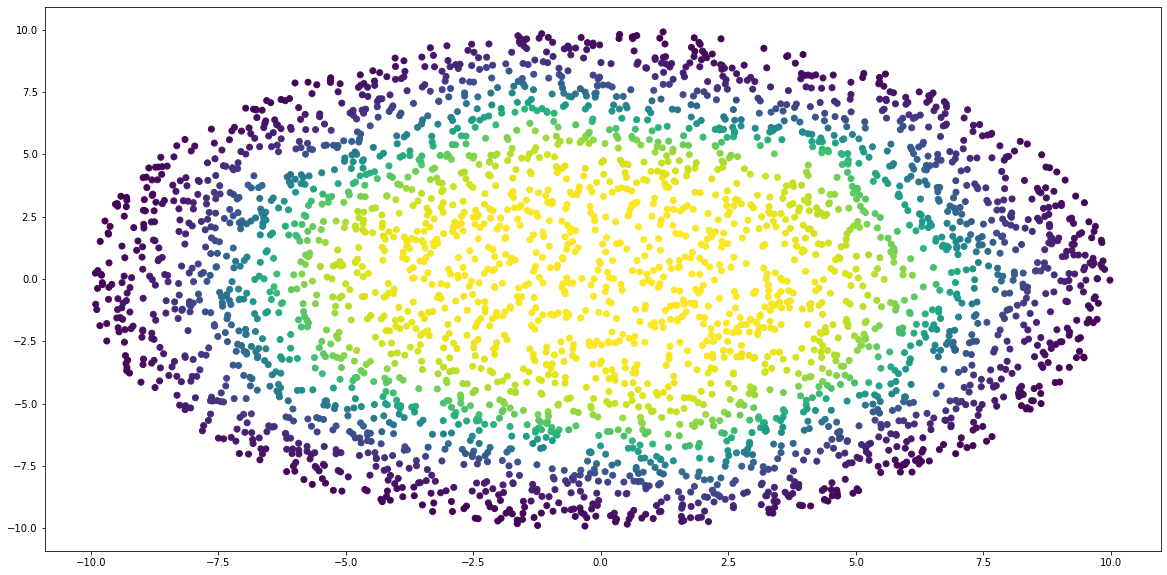

In [169]:
#########################################
# Ваш код

predict_neural = model.predict(X_test)
predict_classes = (predict_neural>0.5).astype(int)

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural[:,0])
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)